# Building A Handwritten Digits Classifier

In this project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

In [21]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
data = load_digits() #Import load_digits() from the sklearn.datasets package.
labels = pd.Series(data['target'])
data = pd.DataFrame(data['data']) #Transform the NumPy 2D array into a pandas dataframe.
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


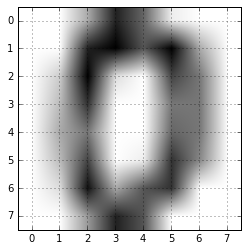

In [22]:
#Use matplotlib to visualize the first image in the dataset.

first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

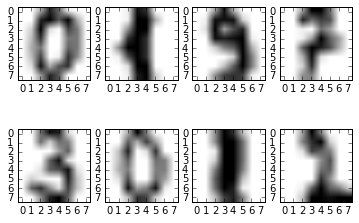

In [23]:
#Use matplotlib to visualize some of the images in the dataset.

f, axarr = plt.subplots(2, 4) #Generate a scatter plot grid, with 2 rows and 4 columns.

#Display the images corresponding to rows 0, 100, 200, and 300.
axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

#Display the images corresponding to rows 1000, 1100, 1200, and 1300.
axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## Try K-Nearest Neighbor Algorithm

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. K-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

We can use the KNeighborsClassifier package to train and test k-nearest neighbors models.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

#Write a function named train() that uses KNeighborsClassifer for training k-nearest neighbors models.
def train_knn(k,train_columns, train_labels):
    # Instantiate ML model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit model to data
    knn.fit(train_columns, train_labels)

    return knn
   
#Write a function named test() that tests the model.
def test(model, test_columns, test_labels):
    # Use model to make predictions.
    predictions = model.predict(test_columns)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df['predicted_label'] == train_test_df['correct_label'])/len(train_test_df)
    return overall_accuracy
    
#Write a function named cross_validate() that performs 4-fold cross validation using train() and test()          
def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state = 2)
    
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
    
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

0.9677233358079684

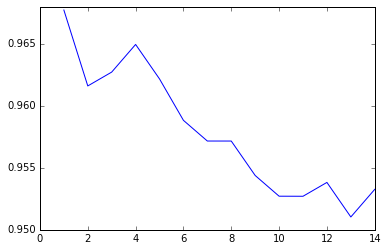

In [32]:
#Experiment with different values for k and plot the resulting classification accuracies.
k_values = range(1,15)
k_means = []
for i in k_values:
    knn_one_accuracies = cross_validate(i)
    k_means.append(np.mean(knn_one_accuracies))
plt.figure(figsize=(8,4))    
plt.plot(k_values, k_means)

Above we see that k-nearest neighbor achieved around 97% accuracy classifying the images. 

There are a few downsides to using k-nearest neighbors:

- high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
- no model representation to debug and explore

Let's now try a neural network with a single hidden layer. Use the MLPClassifier package from scikit-learn.

## Neural Network Model

In [49]:
from sklearn.neural_network import MLPClassifier


def train_mlp(neurons,train_columns, train_labels):
    # Instantiate ML model
    mlp = MLPClassifier(hidden_layer_sizes=neurons, solver = 'lbfgs')
    #hit convergence error using 'Adam" solver, changed to 'lbfgs' which is used for smaller data sets

    # Fit model to data
    mlp.fit(train_columns, train_labels)

    return mlp

def mlp_cross_validate(neurons):
    fold_accuracies = []
    kf = KFold(n_splits=4, random_state = 2)
    
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_mlp(neurons, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

mlp_accuracies = mlp_cross_validate((1,))
np.mean(mlp_accuracies)

0.0985003711952487

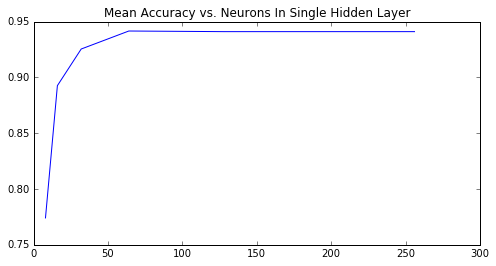

In [47]:
#Use 4 fold cross validation to train with varying levels of neurons
neuron_values = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
neuron_means = []
for i in neuron_values:
    mlp_accuracies = mlp_cross_validate(i)
    neuron_means.append(np.mean(mlp_accuracies))
plt.figure(figsize=(8,4))    
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")
plt.plot(neuron_values, neuron_means)

#### Summary

It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 86% to approximately 94%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

### Neural Network With Two Hidden Layers

In [50]:
#Train a neural network model using 2 hidden layers
mlp_accuracies = mlp_cross_validate((64,64))
np.mean(mlp_accuracies)

0.9343244246473644

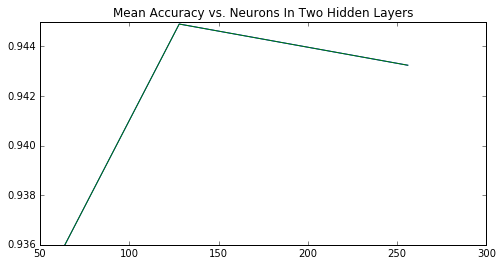

In [52]:
#Use 4 fold cross validation to train with two hidden layers
neuron_values = [
    (64,64),
    (128,128),
    (256,256)
]
neuron_means = []
for i in neuron_values:
    mlp_accuracies = mlp_cross_validate(i)
    neuron_means.append(np.mean(mlp_accuracies))
plt.figure(figsize=(8,4))    
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")
plt.plot(neuron_values, neuron_means)

#### Summary

Using 2 hidden layers improved our simple accuracy to 95%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

### Neural Network With Three Hidden Layers

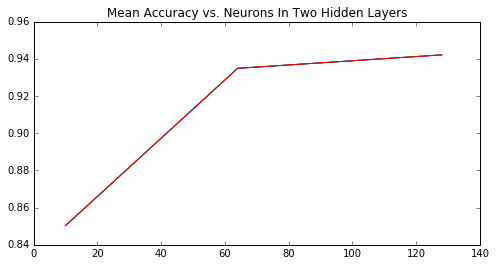

In [51]:
#Use 4 fold cross validation to train with three hidden layers
neuron_values = [
    (10,10,10),
    (64,64,64),
    (128,128,128),
]
neuron_means = []
for i in neuron_values:
    mlp_accuracies = mlp_cross_validate(i)
    neuron_means.append(np.mean(mlp_accuracies))
plt.figure(figsize=(8,4))    
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")
plt.plot(neuron_values, neuron_means)

#### Summary

Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.